In [1]:
import sys
import re
import numpy as np
import pandas as pd
import pysam
import matplotlib.pyplot as plt
import seaborn as sns
import pysam
import gget

In [7]:
old_path = f"/nfs/turbo/umms-indikar/shared/projects/poreC/data/fastq/p2/scPC96o_3/merged_fastq/barcode01.fastq"
new_path = f"/scratch/indikar_root/indikar1/cstansbu/scpc_test/fastq/b01.raw.fastq"


res = []

for i, fpath in enumerate([old_path, new_path]):
    fastq = pysam.FastxFile(fpath)
    fastq_name = 'old' if i == 0 else 'new'

    for read in fastq:
        read_name = read.name
        quals = read.get_quality_array()

        row = {
            'fastq_name' : fastq_name,
            'read_name' : read_name,
            'mean_base_quality' : np.mean(quals),
            'median_base_quality' : np.median(quals),
            'min_base_quality' : np.min(quals),
            'max_base_quality' : np.max(quals),
        }
        res.append(row)

        
res = pd.DataFrame(res)
print(f"{res.shape=}")
res['read_in'] = res.groupby('read_name')['fastq_name'].transform('count')
res.head()

res.shape=(968405, 6)


,fastq_name,read_name,mean_base_quality,median_base_quality,min_base_quality,max_base_quality,read_in
0,old,a6771700-9e14-487e-9ecc-e3afced24202,26.400593,32.0,3,50,2
1,old,726023a8-4a0f-42c4-9943-b2e6593af884,17.374690,15.0,2,50,2
2,old,573b9ae0-ab96-4e8b-94d4-086bee8988e1,24.705882,25.5,2,50,2
3,old,4b24ca4e-8c30-4b4f-8e53-89245c600e5f,21.502907,21.0,2,50,2
4,old,8a5266bb-54a5-425b-aea0-8cca816eb769,29.705298,33.5,3,50,2


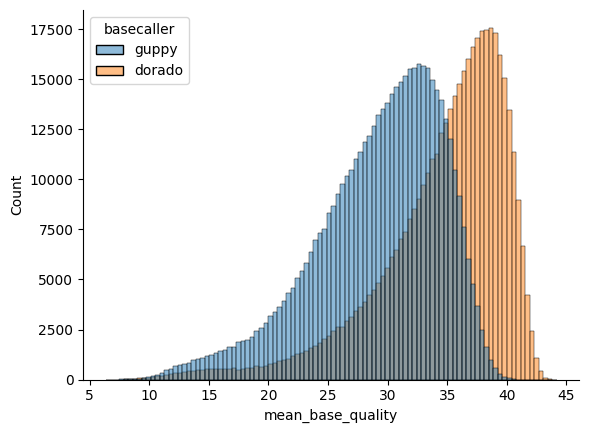

In [14]:
res['basecaller'] = np.where(res['fastq_name'] == 'old', 'guppy', 'dorado')

sns.histplot(data=res, 
             x='mean_base_quality',
             bins=100,
             hue='basecaller')

sns.despine()

In [16]:
res['read_in'].value_counts(normalize=True)

read_in
2    0.931649
1    0.068351
Name: proportion, dtype: float64